# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
%matplotlib inline

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from weather_api import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(city)




college


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")
record_count = 1
set_count = 1
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = base_url + "&q=" + city
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count = record_count + 1
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
        
        
   
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mananjary
Processing Record 2 of Set 1 | bilma
Processing Record 3 of Set 1 | caravelas
Processing Record 4 of Set 1 | martapura
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | belaya gora
Processing Record 7 of Set 1 | dhankuta
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | dicabisagan
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | tulum
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | ahipara
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | smithers
Processing Record 22 of Set 1 | knysna
Processing Rec

Processing Record 37 of Set 4 | cherskiy
Processing Record 38 of Set 4 | meadow lake
Processing Record 39 of Set 4 | teguldet
Processing Record 40 of Set 4 | nova olimpia
Processing Record 41 of Set 4 | kuhestan
City not found. Skipping...
Processing Record 42 of Set 4 | caohe
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | santa maria
Processing Record 45 of Set 4 | andros town
Processing Record 46 of Set 4 | camacupa
Processing Record 47 of Set 4 | mangrol
Processing Record 48 of Set 4 | karratha
Processing Record 49 of Set 4 | qasigiannguit
Processing Record 0 of Set 5 | iralaya
Processing Record 1 of Set 5 | avila
Processing Record 2 of Set 5 | rio grande
Processing Record 3 of Set 5 | at-bashi
Processing Record 4 of Set 5 | axim
Processing Record 5 of Set 5 | rawson
Processing Record 6 of Set 5 | okha
Processing Record 7 of Set 5 | ciudad bolivar
Processing Record 8 of Set 5 | yenagoa
Processing Record 9 of Set 5 | moranbah
Processing Record 10 of S

Processing Record 26 of Set 8 | palu
Processing Record 27 of Set 8 | katobu
Processing Record 28 of Set 8 | almeirim
Processing Record 29 of Set 8 | angouleme
Processing Record 30 of Set 8 | laguna
Processing Record 31 of Set 8 | riyadh
Processing Record 32 of Set 8 | lusaka
Processing Record 33 of Set 8 | kiunga
Processing Record 34 of Set 8 | pavlovsk
Processing Record 35 of Set 8 | udachnyy
Processing Record 36 of Set 8 | adeje
Processing Record 37 of Set 8 | eureka
Processing Record 38 of Set 8 | amapa
Processing Record 39 of Set 8 | machala
Processing Record 40 of Set 8 | khandyga
Processing Record 41 of Set 8 | abalak
Processing Record 42 of Set 8 | saint-pierre
Processing Record 43 of Set 8 | fauske
Processing Record 44 of Set 8 | buenos aires
Processing Record 45 of Set 8 | kysyl-syr
Processing Record 46 of Set 8 | damietta
Processing Record 47 of Set 8 | chipata
Processing Record 48 of Set 8 | tadine
Processing Record 49 of Set 8 | libenge
Processing Record 0 of Set 9 | ushtob

Processing Record 17 of Set 12 | baykit
Processing Record 18 of Set 12 | kushmurun
Processing Record 19 of Set 12 | zalantun
Processing Record 20 of Set 12 | dongfeng
Processing Record 21 of Set 12 | chapleau
Processing Record 22 of Set 12 | puerto escondido
Processing Record 23 of Set 12 | grafton
Processing Record 24 of Set 12 | mitu
Processing Record 25 of Set 12 | rajapur
Processing Record 26 of Set 12 | chahuites
Processing Record 27 of Set 12 | hay river
Processing Record 28 of Set 12 | olafsvik
Processing Record 29 of Set 12 | bilibino
Processing Record 30 of Set 12 | aflu
City not found. Skipping...
Processing Record 31 of Set 12 | batemans bay
Processing Record 32 of Set 12 | villa guerrero
Processing Record 33 of Set 12 | katherine
Processing Record 34 of Set 12 | rancho palos verdes
Processing Record 35 of Set 12 | iqaluit
Processing Record 36 of Set 12 | kisangani
Processing Record 37 of Set 12 | russell
Processing Record 38 of Set 12 | imbituba
Processing Record 39 of Set 

In [9]:
print(json.dumps(city_weather, indent=4, sort_keys=True)) #shows how to get to the values we are interested in

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 64.8569,
        "lon": -147.8028
    },
    "dt": 1657702079,
    "id": 5859699,
    "main": {
        "feels_like": 63.99,
        "humidity": 73,
        "pressure": 1000,
        "temp": 64.42,
        "temp_max": 67.95,
        "temp_min": 59.09
    },
    "name": "College",
    "sys": {
        "country": "US",
        "id": 7683,
        "sunrise": 1657712783,
        "sunset": 1657786030,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 6437,
    "weather": [
        {
            "description": "smoke",
            "icon": "50n",
            "id": 711,
            "main": "Smoke"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 3.44
    }
}


In [10]:
print(len(cities))
# shows number of cities

604


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(city_data)
weather_df
#shows 551 cities in the list

NameError: name 'city_data' is not defined

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
high_humidity = weather_df.loc[weather_df["Humidity"] >= 100]
high_humidity.head(50) #returns 4 cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
150,santa cruz cabralia,-16.2781,-39.0247,64.63,100,20,1.14,BR,1657702032
418,nuuk,64.1835,-51.7216,39.81,100,100,1.14,GL,1657701829
477,praia da vitoria,38.7333,-27.0667,74.75,100,100,13.47,PT,1657702071
535,russell,32.3502,-85.1999,75.00,100,100,4.61,US,1657702078


In [19]:
#  Get the indices of cities that have humidity over 100%.
indices = [150, 418, 477, 535]

In [20]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(weather_df.index[[150, 418, 477, 535]])

In [21]:
weather_df
#returns 551 rows

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mananjary,-21.2167,48.3333,71.13,77,56,4.12,MG,1657701742
1,bilma,18.6853,12.9164,96.57,14,97,11.01,NE,1657702015
2,caravelas,-17.7125,-39.2481,67.68,90,5,2.86,BR,1657702015
3,martapura,-3.4167,114.8500,82.49,74,40,5.75,ID,1657702015
4,tuktoyaktuk,69.4541,-133.0374,35.87,96,100,11.43,CA,1657702015
...,...,...,...,...,...,...,...,...,...
546,ramotswa,-24.8716,25.8699,64.02,33,6,8.01,BW,1657702079
547,navahrudak,53.6000,25.8333,58.69,82,89,15.14,BY,1657702079
548,ebejico,6.3260,-75.7683,67.62,98,100,0.89,CO,1657702079
549,cortez,37.3489,-108.5859,65.16,69,0,4.61,US,1657702079


In [25]:
clean_city_data
#returns 547 rows, showing that the previous high humidity rows were successfully removed

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mananjary,-21.2167,48.3333,71.13,77,56,4.12,MG,1657701742
1,bilma,18.6853,12.9164,96.57,14,97,11.01,NE,1657702015
2,caravelas,-17.7125,-39.2481,67.68,90,5,2.86,BR,1657702015
3,martapura,-3.4167,114.8500,82.49,74,40,5.75,ID,1657702015
4,tuktoyaktuk,69.4541,-133.0374,35.87,96,100,11.43,CA,1657702015
...,...,...,...,...,...,...,...,...,...
546,ramotswa,-24.8716,25.8699,64.02,33,6,8.01,BW,1657702079
547,navahrudak,53.6000,25.8333,58.69,82,89,15.14,BY,1657702079
548,ebejico,6.3260,-75.7683,67.62,98,100,0.89,CO,1657702079
549,cortez,37.3489,-108.5859,65.16,69,0,4.61,US,1657702079


# Saving DataFrame to CSV file

In [26]:
#Capitalise city names 

clean_city_data["City"] = clean_city_data["City"].str.capitalize()

#rename columns
clean_weather_data = clean_city_data.rename(columns={"City":"City", "Lat":"Latitude", "Lng":"Longitude", "Max Temp":"Temperature (F)",
                                                     "Humidity":"Humidity (%)", "Cloudiness":"Cloudiness (%)", 
                                                     "Wind Speed":"Wind Speed (mph)", "Country":"Country"})
clean_weather_data.head()


,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Mananjary,-21.2167,48.3333,71.13,77,56,4.12,MG,1657701742
1,Bilma,18.6853,12.9164,96.57,14,97,11.01,NE,1657702015
2,Caravelas,-17.7125,-39.2481,67.68,90,5,2.86,BR,1657702015
3,Martapura,-3.4167,114.8500,82.49,74,40,5.75,ID,1657702015
4,Tuktoyaktuk,69.4541,-133.0374,35.87,96,100,11.43,CA,1657702015


In [27]:
clean_weather_data.to_csv("clean_weather_data.csv", index=False) #save to CSV file

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [28]:
#view dataframe once more 
clean_weather_data.head()

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Mananjary,-21.2167,48.3333,71.13,77,56,4.12,MG,1657701742
1,Bilma,18.6853,12.9164,96.57,14,97,11.01,NE,1657702015
2,Caravelas,-17.7125,-39.2481,67.68,90,5,2.86,BR,1657702015
3,Martapura,-3.4167,114.8500,82.49,74,40,5.75,ID,1657702015
4,Tuktoyaktuk,69.4541,-133.0374,35.87,96,100,11.43,CA,1657702015


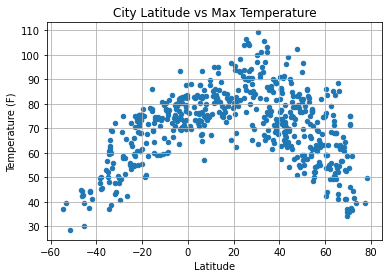

In [35]:
clean_weather_data["Latitude"] = pd.to_numeric(clean_weather_data["Latitude"])
clean_weather_data["Temperature (F)"] = pd.to_numeric(clean_weather_data["Temperature (F)"])

clean_weather_data.plot.scatter(x="Latitude", y="Temperature (F)",
                  grid=True, title="City Latitude vs Max Temperature")
plt.show()

## Latitude vs. Humidity Plot

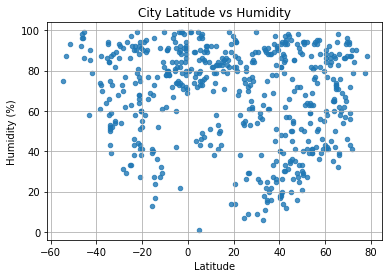

In [37]:
clean_weather_data["Latitude"] = pd.to_numeric(clean_weather_data["Latitude"])
clean_weather_data["Humidity (%)"] = pd.to_numeric(clean_weather_data["Humidity (%)"])

clean_weather_data.plot.scatter(x="Latitude", grid=True,
            y="Humidity (%)",
            alpha=0.8, title="City Latitude vs Humidity")

plt.show()

## Latitude vs. Cloudiness Plot

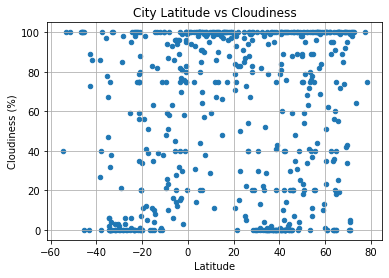

In [38]:
clean_weather_data.plot.scatter(x="Latitude", y="Cloudiness (%)",
                  grid=True, title="City Latitude vs Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

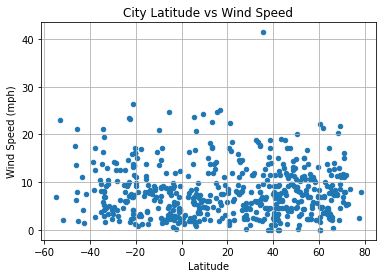

In [39]:
clean_weather_data.plot.scatter(x="Latitude", y="Wind Speed (mph)",
                  grid=True, title="City Latitude vs Wind Speed")
plt.show()

## Linear Regression

In [45]:
north_hem = clean_weather_data.loc[clean_weather_data["Latitude"] >= 0]
north_hem

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date,Lat,Max Temp
1,Bilma,18.6853,12.9164,96.57,14,97,11.01,NE,1657702015,18.6853,96.57
4,Tuktoyaktuk,69.4541,-133.0374,35.87,96,100,11.43,CA,1657702015,69.4541,35.87
5,Belaya gora,68.5333,146.4167,64.27,67,100,20.24,RU,1657702015,68.5333,64.27
6,Dhankuta,26.9833,87.3333,79.81,73,99,5.30,NP,1657702015,26.9833,79.81
7,Kapaa,22.0752,-159.3190,79.12,86,100,18.41,US,1657702016,22.0752,79.12
...,...,...,...,...,...,...,...,...,...,...,...
545,Tevriz,57.5090,72.4042,62.51,82,99,5.95,RU,1657702078,57.5090,62.51
547,Navahrudak,53.6000,25.8333,58.69,82,89,15.14,BY,1657702079,53.6000,58.69
548,Ebejico,6.3260,-75.7683,67.62,98,100,0.89,CO,1657702079,6.3260,67.62
549,Cortez,37.3489,-108.5859,65.16,69,0,4.61,US,1657702079,37.3489,65.16


In [46]:
#remove the last 2 columns 
north_hem = north_hem.drop(columns= ["Lat", "Max Temp"])
north_hem #returns 366 rows

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
1,Bilma,18.6853,12.9164,96.57,14,97,11.01,NE,1657702015
4,Tuktoyaktuk,69.4541,-133.0374,35.87,96,100,11.43,CA,1657702015
5,Belaya gora,68.5333,146.4167,64.27,67,100,20.24,RU,1657702015
6,Dhankuta,26.9833,87.3333,79.81,73,99,5.30,NP,1657702015
7,Kapaa,22.0752,-159.3190,79.12,86,100,18.41,US,1657702016
...,...,...,...,...,...,...,...,...,...
545,Tevriz,57.5090,72.4042,62.51,82,99,5.95,RU,1657702078
547,Navahrudak,53.6000,25.8333,58.69,82,89,15.14,BY,1657702079
548,Ebejico,6.3260,-75.7683,67.62,98,100,0.89,CO,1657702079
549,Cortez,37.3489,-108.5859,65.16,69,0,4.61,US,1657702079


In [47]:
north_hem.dtypes

City                 object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)          int64
Cloudiness (%)        int64
Wind Speed (mph)    float64
Country              object
Date                  int64
dtype: object

In [49]:
south_hem = clean_weather_data.loc[clean_weather_data["Latitude"] < 0]
south_hem

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date,Lat,Max Temp
0,Mananjary,-21.2167,48.3333,71.13,77,56,4.12,MG,1657701742,-21.2167,71.13
2,Caravelas,-17.7125,-39.2481,67.68,90,5,2.86,BR,1657702015,-17.7125,67.68
3,Martapura,-3.4167,114.8500,82.49,74,40,5.75,ID,1657702015,-3.4167,82.49
8,Rikitea,-23.1203,-134.9692,75.02,74,100,10.09,PF,1657702016,-23.1203,75.02
9,Busselton,-33.6500,115.3333,59.85,59,38,1.57,AU,1657702016,-33.6500,59.85
...,...,...,...,...,...,...,...,...,...,...,...
536,Imbituba,-28.2400,-48.6703,58.86,91,98,4.21,BR,1657702078,-28.2400,58.86
537,Coxim,-18.5067,-54.7600,63.99,89,12,2.84,BR,1657702078,-18.5067,63.99
538,Broken hill,-31.9500,141.4333,47.48,55,3,9.71,AU,1657702078,-31.9500,47.48
539,Ambunti,-4.2365,142.8448,80.53,75,96,2.57,PG,1657702078,-4.2365,80.53


In [50]:
#drop last 2 columns 
south_hem = south_hem.drop(columns= ["Lat", "Max Temp"])
south_hem #returns 181 rows 

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Mananjary,-21.2167,48.3333,71.13,77,56,4.12,MG,1657701742
2,Caravelas,-17.7125,-39.2481,67.68,90,5,2.86,BR,1657702015
3,Martapura,-3.4167,114.8500,82.49,74,40,5.75,ID,1657702015
8,Rikitea,-23.1203,-134.9692,75.02,74,100,10.09,PF,1657702016
9,Busselton,-33.6500,115.3333,59.85,59,38,1.57,AU,1657702016
...,...,...,...,...,...,...,...,...,...
536,Imbituba,-28.2400,-48.6703,58.86,91,98,4.21,BR,1657702078
537,Coxim,-18.5067,-54.7600,63.99,89,12,2.84,BR,1657702078
538,Broken hill,-31.9500,141.4333,47.48,55,3,9.71,AU,1657702078
539,Ambunti,-4.2365,142.8448,80.53,75,96,2.57,PG,1657702078


####  Northern Hemisphere - Temperature vs. Latitude Linear Regression

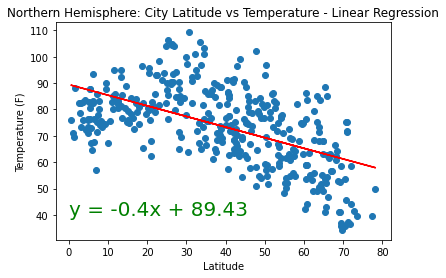

The r-value is -0.5527324905917129


In [92]:
x_values = north_hem["Latitude"]
y_values = north_hem["Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x=x_values, y=y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_equation, (0, 40), fontsize=20, color="green")
plt.title("Northern Hemisphere: City Latitude vs Temperature - Linear Regression")
plt.xlabel("Latitude")
plt.ylabel('Temperature (F)')
plt.show()

print(f'The r-value is {rvalue}')

The plot above shows that as the latitude increases, the temperature tends to decrease as well

####  Southern Hemisphere - Temperature vs. Latitude Linear Regression

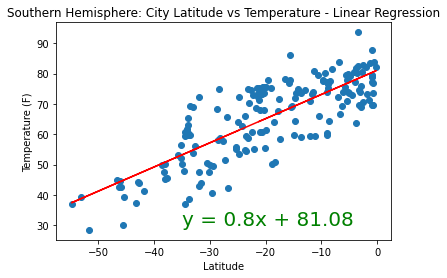

The r-value is 0.8055819879313866


In [91]:
stemp_x_values = south_hem["Latitude"]
stemp_y_values = south_hem["Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(stemp_x_values, stemp_y_values)

regress_values = stemp_x_values * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x=stemp_x_values, y=stemp_y_values)
plt.plot(stemp_x_values, regress_values, "r-")

plt.annotate(line_equation, (-35, 30), fontsize=20, color="green")
plt.title("Southern Hemisphere: City Latitude vs Temperature - Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

print(f'The r-value is {rvalue}')

This plot above shows that as the latitude increases, the temperature increases as well

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

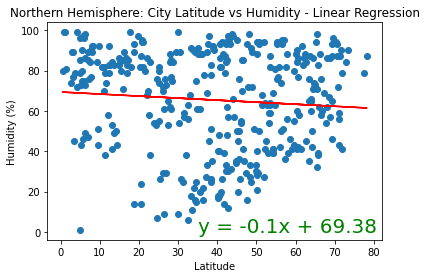

The r-value is -0.08239921028267573


In [93]:
nhum_x_values = north_hem["Latitude"]
nhum_y_values = north_hem["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nhum_x_values, nhum_y_values)

regress_values = nhum_x_values * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x=nhum_x_values, y=nhum_y_values)
plt.plot(nhum_x_values, regress_values, "r-")

plt.annotate(line_equation, (35, 0), fontsize=20, color="green")
plt.title("Northern Hemisphere: City Latitude vs Humidity - Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

print(f'The r-value is {rvalue}')

The plot above does not show a strong relationship between latitude and humidity - the line shows that as latitude increases,
humidity decreases only very slightly

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

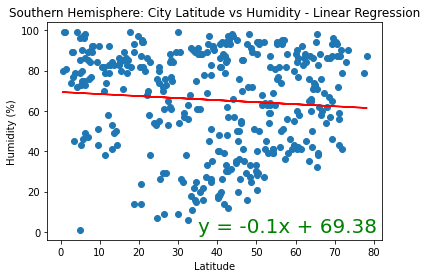

The r-value is -0.08239921028267573


In [95]:
shum_x_values = north_hem["Latitude"]
shum_y_values = north_hem["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(shum_x_values, shum_y_values)

regress_values = shum_x_values * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x=shum_x_values, y=shum_y_values)
plt.plot(shum_x_values, regress_values, "r-")

plt.annotate(line_equation, (35, 0), fontsize=20, color="green")
plt.title("Southern Hemisphere: City Latitude vs Humidity - Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

print(f'The r-value is {rvalue}')

Similar observation as previous plot -  the line shows that as latitude increases, humidity decreases only very slightly

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

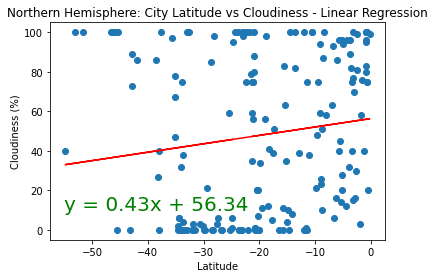

The r-value is 0.1425393721555988


In [96]:
ncloud_x_values = south_hem["Latitude"]
ncloud_y_values = south_hem["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(ncloud_x_values, ncloud_y_values)

regress_values = ncloud_x_values * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x=ncloud_x_values, y=ncloud_y_values)
plt.plot(ncloud_x_values, regress_values, "r-")

plt.annotate(line_equation, (-55, 10), fontsize=20, color="green")
plt.title("Northern Hemisphere: City Latitude vs Cloudiness - Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

print(f'The r-value is {rvalue}')

In this plot above, the linear regression shows cloudiness increases as latitude increases

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

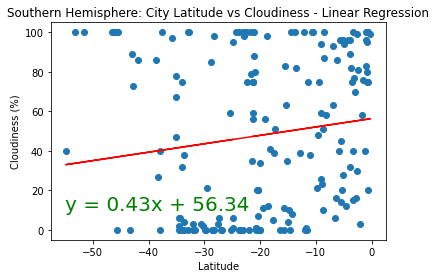

The r-value is 0.1425393721555988


In [97]:
scloud_x_values = south_hem["Latitude"]
scloud_y_values = south_hem["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(scloud_x_values, scloud_y_values)

regress_values = scloud_x_values * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x=scloud_x_values, y=scloud_y_values)
plt.plot(scloud_x_values, regress_values, "r-")

plt.annotate(line_equation, (-55, 10), fontsize=20, color="green")
plt.title("Southern Hemisphere: City Latitude vs Cloudiness - Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

print(f'The r-value is {rvalue}')

This plot above also shows that the cloudiness increases as the latitude increases

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

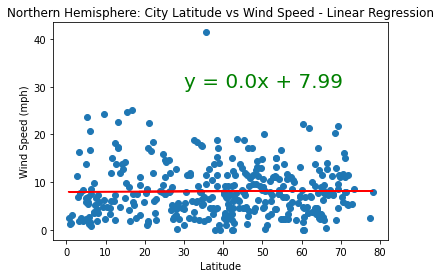

The r-value is 0.008763356878986753


In [98]:
nwind_x_values = north_hem["Latitude"]
nwind_y_values = north_hem["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(nwind_x_values, nwind_y_values)

regress_values = nwind_x_values * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x=nwind_x_values, y=nwind_y_values)
plt.plot(nwind_x_values, regress_values, "r-")

plt.annotate(line_equation, (30, 30), fontsize=20, color="green")
plt.title("Northern Hemisphere: City Latitude vs Wind Speed - Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

print(f'The r-value is {rvalue}')

The plot above shows that all of the cities (except 1) all had a wind speed of less than 30mph. There is no strong relationship
between city atitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

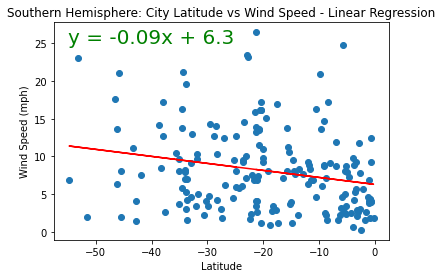

The r-value is -0.22577657370375007


In [99]:
swind_x_values = south_hem["Latitude"]
swind_y_values = south_hem["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(swind_x_values, swind_y_values)

regress_values = swind_x_values * slope + intercept
line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x=swind_x_values, y=swind_y_values)
plt.plot(swind_x_values, regress_values, "r-")

plt.annotate(line_equation, (-55, 25), fontsize=20, color="green")
plt.title("Southern Hemisphere: City Latitude vs Wind Speed - Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()

print(f'The r-value is {rvalue}')

This plot above shows that the max wind speed was just over 25mph, but the linear regression shows that as latitude increases, the wind speed decreases. 

# Observable trends based on the data

* Based on the data, we can see the temperature is highest near the equator, and towards the far end of the latitudes (-60 and 80), the temperatures are the lowest. 

* The far ends of the latitudes also tend to have high humidity, but high humidity is also observed across all latitudes. The lowest humidity observed was at close to 0 latitude.

* The relationship observed between city latitude and wind speed was not particularly strong when plotted on a chart. All cities except for 1 all had a wind speed of less than 30mph, and this was across all latitudes. The linear regression calculated showed that for the Southern hemisphere, the wind speed decreases as latitude increases. 